## <ins>Introduction</ins>:

Our research aims to assess and increase the total sales and discounts of meat products like beef, Turkey, chicken, pork and frozen meat/ meat dinners respectively as per age group by looking at the demographics dataframe per month.

*Our analysis can be used to answer questions like:*

1)  What are the total sales of these meat products and how much discounts have been applied to these products per month as per different age groups ?

### <ins>Packages Required</ins>:

* _completejourney_py:_ Used to analyze data
* _Pandas:_ Used to analyze and form dataframes
* _Numpy:_ Used to form arrays, lists
* _Matplotlib:_ Used to chart graphs and provide indepth analysis on the business problem

### <ins>Data Preparation</ins>:

This sections contains all the procedures followed in getting the data analysis ready. Each step has been explained and the codes have been given.

##### Data Import

We are using the Complete Journey package for this analysis. The dataset *transactions* represents grocery store shopping transactions over one year from a group of 2,469 households. The dataset *products* contains product related information like department, product category, product type and brand. The dataset *demographics* consists of information related to different age groups belonging to different households buying these meat products present in the product_categories of products

**Packages Import Code:**

In [1]:
import pandas as pd
from completejourney_py import get_data
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

Below are the datasets used from CompleteJourney

In [2]:
cj_data = get_data()
demographics = cj_data['demographics']
demographics.head(5)

,household_id,age,income,home_ownership,marital_status,household_size,household_comp,kids_count
0,1,65+,35-49K,Homeowner,Married,2,2 Adults No Kids,0
1,1001,45-54,50-74K,Homeowner,Unmarried,1,1 Adult No Kids,0
2,1003,35-44,25-34K,None,Unmarried,1,1 Adult No Kids,0
3,1004,25-34,15-24K,None,Unmarried,1,1 Adult No Kids,0
4,101,45-54,Under 15K,Homeowner,Married,4,2 Adults Kids,2


In [3]:
products = cj_data['products']
products.head(5)

,product_id,manufacturer_id,department,brand,product_category,product_type,package_size
0,25671,2,GROCERY,National,FRZN ICE,ICE - CRUSHED/CUBED,22 LB
1,26081,2,MISCELLANEOUS,National,None,None,None
2,26093,69,PASTRY,Private,BREAD,BREAD:ITALIAN/FRENCH,None
3,26190,69,GROCERY,Private,FRUIT - SHELF STABLE,APPLE SAUCE,50 OZ
4,26355,69,GROCERY,Private,COOKIES/CONES,SPECIALTY COOKIES,14 OZ


In [4]:
transactions = cj_data['transactions']
transactions.head(5)

,household_id,store_id,basket_id,product_id,quantity,sales_value,retail_disc,coupon_disc,coupon_match_disc,week,transaction_timestamp
0,900,330,31198570044,1095275,1,0.50,0.00,0.0,0.0,1,2017-01-01 11:53:26
1,900,330,31198570047,9878513,1,0.99,0.10,0.0,0.0,1,2017-01-01 12:10:28
2,1228,406,31198655051,1041453,1,1.43,0.15,0.0,0.0,1,2017-01-01 12:26:30
3,906,319,31198705046,1020156,1,1.50,0.29,0.0,0.0,1,2017-01-01 12:30:27
4,906,319,31198705046,1053875,2,2.78,0.80,0.0,0.0,1,2017-01-01 12:30:27


**Data Description:**

### <ins>Transactions</ins>:

household_id -> Unique ID for each household<br>
store_id -> Uniquely identifies each store<br>
basket_id -> Uniquely identifies each purchase occasion<br>
product_id -> Uniquely identifies each product<br>
quantity -> Number of the product purchased during the visit<br>
retail_disc -> Discount applied due to the retailer’s loyalty card program<br>
coupon_disc -> Discount applied due to a manufacturer coupon<br>
coupon_match_disc -> Discount applied due to retailer’s match of manufacturer coupon<br>
week -> Week of the transaction; Ranges 1-53<br>
transaction_timestamp -> Date and time of day when the transaction occurred<br>

### <ins>Products</ins>:

product_id -> Uniquely identifies each product<br>
manufacturer_id -> Uniquely identifies each manufacturer<br>
department -> Groups similar products together<br>
brand -> Indicates private or national label brand<br>
product_category -> Groups similar products together at lower level<br>
product_type -> Groups similar products together at lowest level<br>
package_size -> Indicates package size (not available for all products)<br>

### <ins>Demographics</ins>:

household_id -> Unique ID for each household<br>
age -> Age Range of buyers<br>
income -> Income range of buyers<br>
home_ownership -> Rental/Owner of House<br>
marital_status -> Marital Status of buyers<br>
household_size -> Number of members in buyers house<br>
household_comp -> Demographic description of members of the house<br>
kids_count -> Number of kids in buyers house<br>

### <ins>Exploratory Data Analysis</ins>:

Here we have cumulated the retail, coupon and coupon match discount.
We have also extracted month from the trasanction timestamp as it will be useful for plotting graphs in further analysis.

In [17]:
discount_amount =(
 transactions['retail_disc'] + transactions['coupon_disc']  + transactions['coupon_match_disc']
)
transactions['discount_amount'] = discount_amount
transactions['month'] =pd.DatetimeIndex(transactions['transaction_timestamp']).month
transactions.head(5)

,household_id,store_id,basket_id,product_id,quantity,sales_value,retail_disc,coupon_disc,coupon_match_disc,week,transaction_timestamp,discount_amount,month
0,900,330,31198570044,1095275,1,0.50,0.00,0.0,0.0,1,2017-01-01 11:53:26,0.00,1
1,900,330,31198570047,9878513,1,0.99,0.10,0.0,0.0,1,2017-01-01 12:10:28,0.10,1
2,1228,406,31198655051,1041453,1,1.43,0.15,0.0,0.0,1,2017-01-01 12:26:30,0.15,1
3,906,319,31198705046,1020156,1,1.50,0.29,0.0,0.0,1,2017-01-01 12:30:27,0.29,1
4,906,319,31198705046,1053875,2,2.78,0.80,0.0,0.0,1,2017-01-01 12:30:27,0.80,1


In order to perfrom analysis of our business problem, we have created a sample_data that comprises of product categories of meat department of Regork such as Beef, Frozen meat/meat dinners, chicken, pork and turkey respectively. We created this sample data by first merging the transactions dataframe with  the products dataframe and the demographics dataframe:-

In [49]:
df = transactions.merge(products, how = 'inner', on='product_id')

In [19]:
df1 = df.merge(demographics, how = 'inner', on='household_id')
df1.head(5)

,household_id,store_id,basket_id,product_id,quantity,sales_value,retail_disc,coupon_disc,coupon_match_disc,week,...,product_category,product_type,package_size,age,income,home_ownership,marital_status,household_size,household_comp,kids_count
0,900,330,31198570044,1095275,1,0.50,0.00,0.0,0.0,1,...,ROLLS,ROLLS: BAGELS,4 OZ,35-44,35-49K,Homeowner,Married,2,2 Adults No Kids,0
1,900,330,31541475196,1095275,1,0.25,0.25,0.0,0.0,5,...,ROLLS,ROLLS: BAGELS,4 OZ,35-44,35-49K,Homeowner,Married,2,2 Adults No Kids,0
2,900,330,31672350129,1095275,1,0.25,0.25,0.0,0.0,5,...,ROLLS,ROLLS: BAGELS,4 OZ,35-44,35-49K,Homeowner,Married,2,2 Adults No Kids,0
3,900,330,31883555076,1095275,1,0.50,0.00,0.0,0.0,8,...,ROLLS,ROLLS: BAGELS,4 OZ,35-44,35-49K,Homeowner,Married,2,2 Adults No Kids,0
4,900,330,31944515097,1095275,1,0.50,0.00,0.0,0.0,8,...,ROLLS,ROLLS: BAGELS,4 OZ,35-44,35-49K,Homeowner,Married,2,2 Adults No Kids,0


Here we have sampled data to extract a select variety of meat products to further analyse and explore few business bottlenecks

In [23]:
sample_data = (
(df1['product_category'] == 'BEEF') |
(df1['product_category'] == 'PORK') |
(df1['product_category'] == 'CHICKEN') |
(df1['product_category'] == 'FRZN MEAT/MEAT DINNERS') |
(df1['product_category'] == 'TURKEY')
)

In [24]:
chart1_data =  df1[sample_data]
chart1_data.head(5)

,household_id,store_id,basket_id,product_id,quantity,sales_value,retail_disc,coupon_disc,coupon_match_disc,week,...,product_category,product_type,package_size,age,income,home_ownership,marital_status,household_size,household_comp,kids_count
97,900,330,31541476673,844179,1,3.65,1.84,0.0,0.0,5,...,BEEF,PRIMAL,None,35-44,35-49K,Homeowner,Married,2,2 Adults No Kids,0
98,900,330,31981190533,844179,1,3.29,1.66,0.0,0.0,9,...,BEEF,PRIMAL,None,35-44,35-49K,Homeowner,Married,2,2 Adults No Kids,0
99,900,330,32161361324,844179,1,4.04,0.00,0.0,0.0,11,...,BEEF,PRIMAL,None,35-44,35-49K,Homeowner,Married,2,2 Adults No Kids,0
100,900,330,40788395530,844179,1,5.19,0.00,0.0,0.0,47,...,BEEF,PRIMAL,None,35-44,35-49K,Homeowner,Married,2,2 Adults No Kids,0
119,900,330,33836400628,1083219,1,6.49,0.00,0.0,0.0,26,...,PORK,COOKED,None,35-44,35-49K,Homeowner,Married,2,2 Adults No Kids,0


We have aggregated the sales value per meat product and represented it as a Pie-Chart to show total sales percentages per product

In [25]:
chart1 = ( 
chart1_data.groupby('product_category')
           .agg({'sales_value':'sum'})
           .sort_values(by = 'sales_value' , ascending = False)
)    
chart1

,sales_value
product_category,
BEEF,95891.09
FRZN MEAT/MEAT DINNERS,53788.33
CHICKEN,29628.13
PORK,27499.72
TURKEY,6400.02


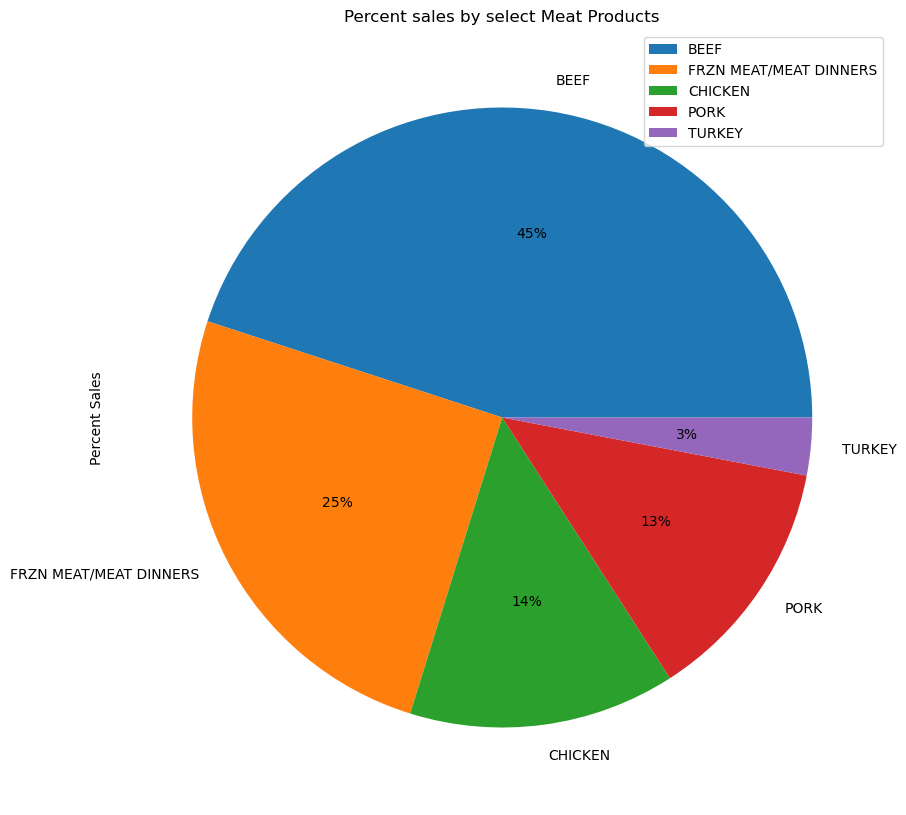

In [50]:
chart1.plot(kind = 'pie', subplots = True, ylabel = 'Percent Sales', autopct = '%1.0f%%',figsize = (10,12))
plt.title('Percent sales by select Meat Products')
plt.legend(loc = 'upper right')
plt.show()

**As we can infer from the pie chart representation mentioned above, <ins>*Beef*</ins> has the most percentage of sales(45 %), followed by frzn meat/Frzn dinners(25%), then chicken(14%) , pork (13%) and turkey(3%) respectively.**

### <ins>ANALYSIS-1</ins>:

After finding out the total_sales of different selected meat categories, we have grouped the chart1_data by age and product_category in order to find its total sales value and discount_amount and store the result in chart2_data dataframe.

In [29]:
Chart2_data = (
chart1_data.groupby(['product_category','age'], as_index = False)
           .agg({'sales_value':'sum','discount_amount':'sum'})
           .sort_values(by = 'sales_value', ascending = False)
)    
Chart2_data.head(5)

,product_category,age,sales_value,discount_amount
3,BEEF,45-54,36485.25,7807.84
2,BEEF,35-44,27123.92,6206.93
15,FRZN MEAT/MEAT DINNERS,45-54,18891.90,6070.33
14,FRZN MEAT/MEAT DINNERS,35-44,15892.64,4648.67
1,BEEF,25-34,14737.40,2598.51


In [30]:
sales_per_age = Chart2_data.drop('discount_amount' , axis='columns')

We pivot the data inorder to plot sales value of selected meat products against age groups.

In [31]:
sales_per_age.pivot(index='age', columns='product_category', values='sales_value')

product_category,BEEF,CHICKEN,FRZN MEAT/MEAT DINNERS,PORK,TURKEY
age,,,,,
19-24,4398.12,1468.80,3280.73,1145.54,192.38
25-34,14737.40,5709.52,8895.85,3522.98,1082.17
35-44,27123.92,7707.99,15892.64,8251.48,1398.59
45-54,36485.25,10824.64,18891.90,10283.93,2623.75
55-64,6955.92,2216.58,3729.84,2334.18,695.23
65+,6190.48,1700.60,3097.37,1961.61,407.90


In [32]:
tick_format = mtick.StrMethodFormatter('${x:,.0f}')

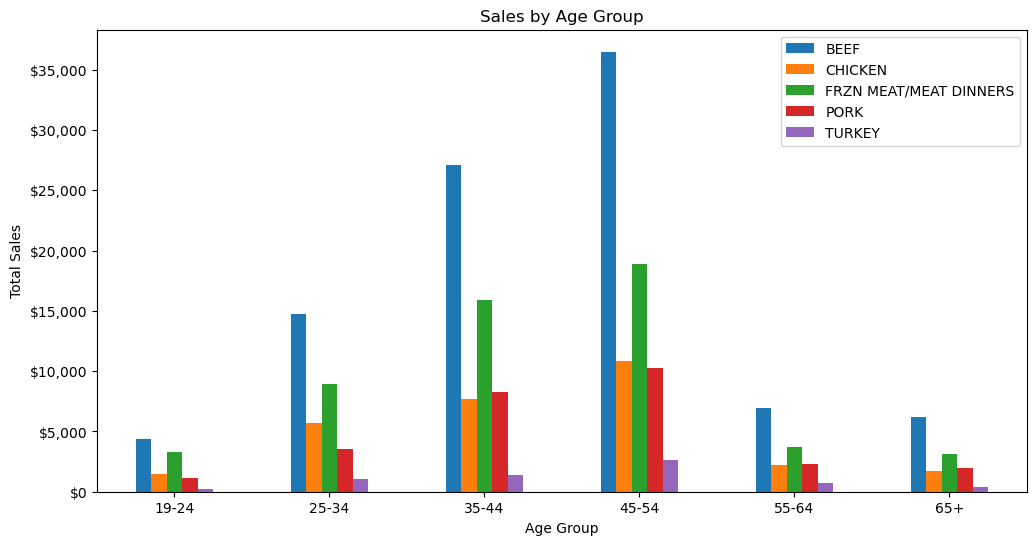

In [34]:
(
sales_per_age.pivot(index='age', columns='product_category', values='sales_value')
             .plot(kind = 'bar', figsize = (12,6) ) 
             .yaxis.set_major_formatter(tick_format)
)    
plt.xlabel('Age Group')
plt.ylabel('Total Sales')
plt.title('Sales by Age Group')
plt.legend(loc = 'upper right')
plt.xticks(rotation=0)
plt.show()

**As per the graph, we can observe that <ins>Beef</ins> is the most preffered meat across all age groups followed by frozen meat and chicken. The age group <ins>45-54</ins> contribute the maximum sale for  the selected meat products.
Similarly, age group <ins>19-24</ins> are the lowest contributors to the sale. It can also be observed that all age groups have a similar trend in meat product purchase with an acceptable error in margin.**

In [35]:
discount_per_age = Chart2_data.drop('sales_value' , axis='columns')

In [36]:
discount_per_age.pivot(index='age', columns='product_category', values='discount_amount')

product_category,BEEF,CHICKEN,FRZN MEAT/MEAT DINNERS,PORK,TURKEY
age,,,,,
19-24,980.10,892.89,905.85,406.74,73.22
25-34,2598.51,3679.59,2404.74,1377.98,254.68
35-44,6206.93,5095.66,4648.67,3778.06,462.02
45-54,7807.84,7629.53,6070.33,4858.41,1061.54
55-64,1562.44,1557.55,1220.74,911.41,283.39
65+,1636.92,1070.66,1056.96,873.55,180.18


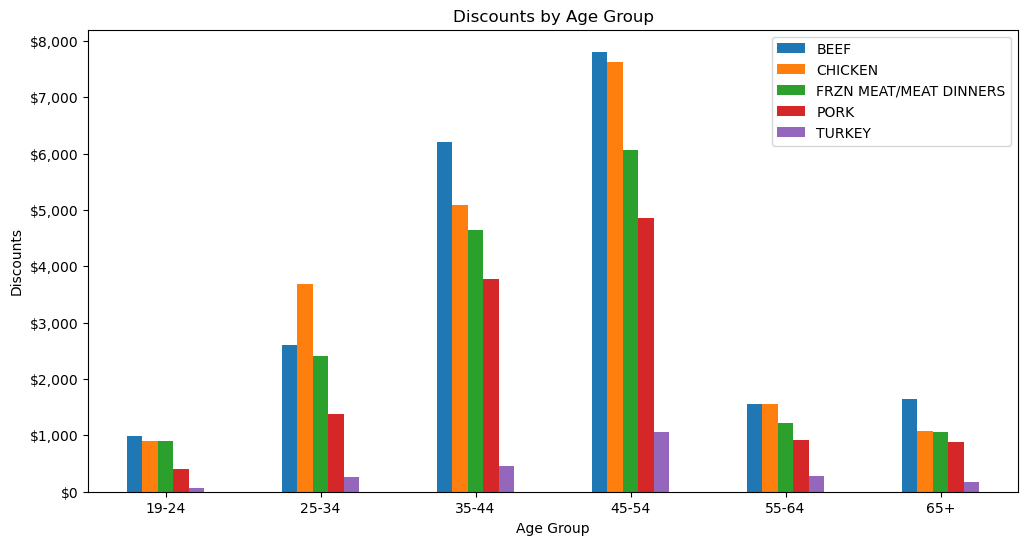

In [37]:
(
discount_per_age.pivot(index='age', columns='product_category', values='discount_amount')
                .plot(kind = 'bar', figsize = (12,6) )
                .yaxis.set_major_formatter(tick_format)
)    
plt.xlabel('Age Group')
plt.ylabel('Discounts')
plt.title('Discounts by Age Group')
plt.legend(loc = 'upper right')
plt.xticks(rotation=0)
plt.show()

**Here we see the distribution of discounts for each of the selected meat products by age group. We can infer that there is a similar trend in availing discounts as it was observed in the total sales graph where age_groups 45-54 availed the most amounts of discounts on selected meat products.**

***A secondary observation is that total amount spent on chicken discounts does not translate to total sales of the chicken product. The store is spending almost equivalent amount in chicken discounts as it is spending for beef discounts but, the actual chicken sales is always observed to be between 25-30% of total beef sales.***

### <ins>ANALYSIS-2</ins>:

We further proceed with analysing meat sale and discounts availed on selected meat products to identify any seasonsal trends.<br>
For this have grouped the chart1_data by month and product_category in order to find its total sales value and discount_amount and store the result in chart3_data dataframe.

In [38]:
Chart3_data = (
chart1_data.groupby(['product_category','month'], as_index = False)
           .agg({'sales_value':'sum','discount_amount':'sum'})
           .sort_values(by = 'month')
)    
Chart3_data.head(5)

,product_category,month,sales_value,discount_amount
0,BEEF,1,7526.43,1582.84
24,FRZN MEAT/MEAT DINNERS,1,4226.74,1230.30
36,PORK,1,2289.05,930.76
12,CHICKEN,1,2595.37,1562.36
48,TURKEY,1,370.02,176.20


In [39]:
sales_per_age_month = Chart3_data.drop('discount_amount' , axis='columns')

In [40]:
month = [1,2,3,4,5,6,7,8,9,10,11,12]
cal_month = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

In [41]:
sales_per_age_month.pivot(index='month', columns='product_category', values='sales_value')

product_category,BEEF,CHICKEN,FRZN MEAT/MEAT DINNERS,PORK,TURKEY
month,,,,,
1,7526.43,2595.37,4226.74,2289.05,370.02
2,7880.00,2439.02,4355.02,2050.02,255.57
3,7564.62,2526.56,4712.09,1944.06,244.62
4,7931.99,2368.85,3755.84,2097.26,315.50
5,9060.43,2774.23,4363.50,2494.46,323.02
6,7824.89,2283.79,3903.16,2160.52,284.43
7,8666.24,2708.10,4180.86,2783.53,285.93
8,8413.83,2536.11,4438.83,2522.04,267.24
9,8210.62,2934.48,4952.00,2735.31,288.13


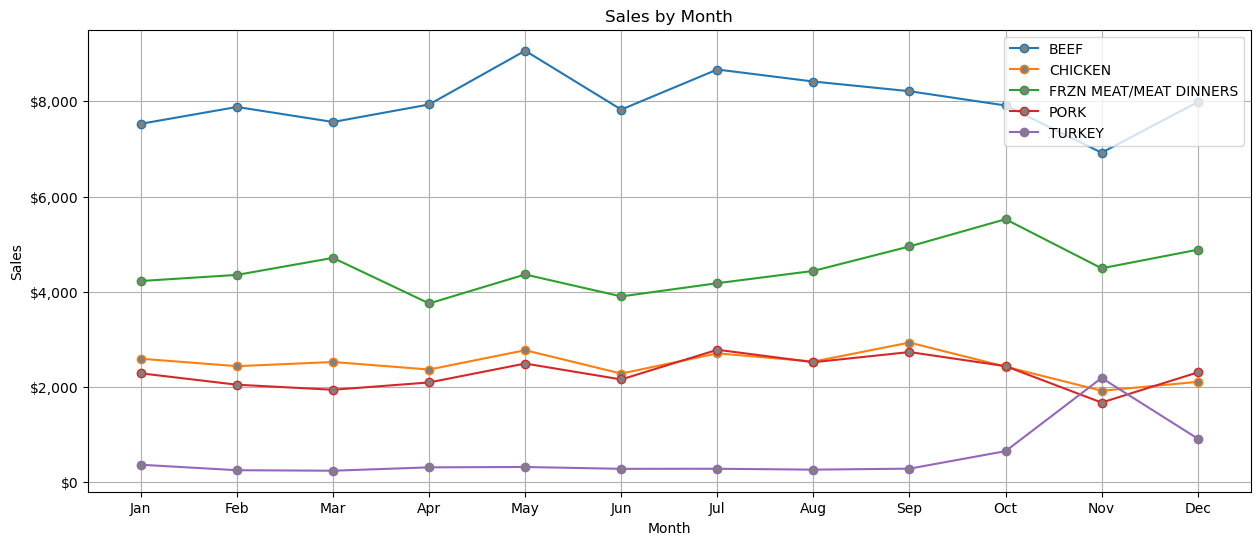

In [42]:
(
sales_per_age_month.pivot(index='month', columns='product_category', values='sales_value')
                   .plot(kind = 'line', figsize  = (15,6), marker = 'o', markerfacecolor = 'grey')
                   .yaxis.set_major_formatter(tick_format)
)    
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Sales by Month')
plt.legend(loc = 'upper right')
plt.grid()
plt.xticks(month,cal_month,rotation=0)
plt.show()

**From the above graph, we observed that most of meat products have a regular trend throughout the year with one exception of Turkey which spiked in sales during the *<ins>Thanksgiving Month(Nov)</ins>* where all other meat products observe a dip in sales.**

In [43]:
discount_per_age_month = Chart3_data.drop('sales_value' , axis='columns')

In [44]:
discount_per_age_month.pivot(index='month', columns='product_category', values='discount_amount')

product_category,BEEF,CHICKEN,FRZN MEAT/MEAT DINNERS,PORK,TURKEY
month,,,,,
1,1582.84,1562.36,1230.30,930.76,176.20
2,1658.53,1535.91,1267.12,942.03,42.29
3,1857.70,1939.47,1792.08,839.38,18.48
4,1391.49,1544.66,1369.00,814.49,60.28
5,1912.50,2500.85,1548.07,1138.15,29.75
6,2096.29,1469.33,1225.56,1101.04,53.85
7,1739.20,2171.88,1105.18,1156.06,36.27
8,2839.91,1462.30,1121.04,1119.49,40.06
9,1526.49,1563.62,1680.31,1281.54,12.99


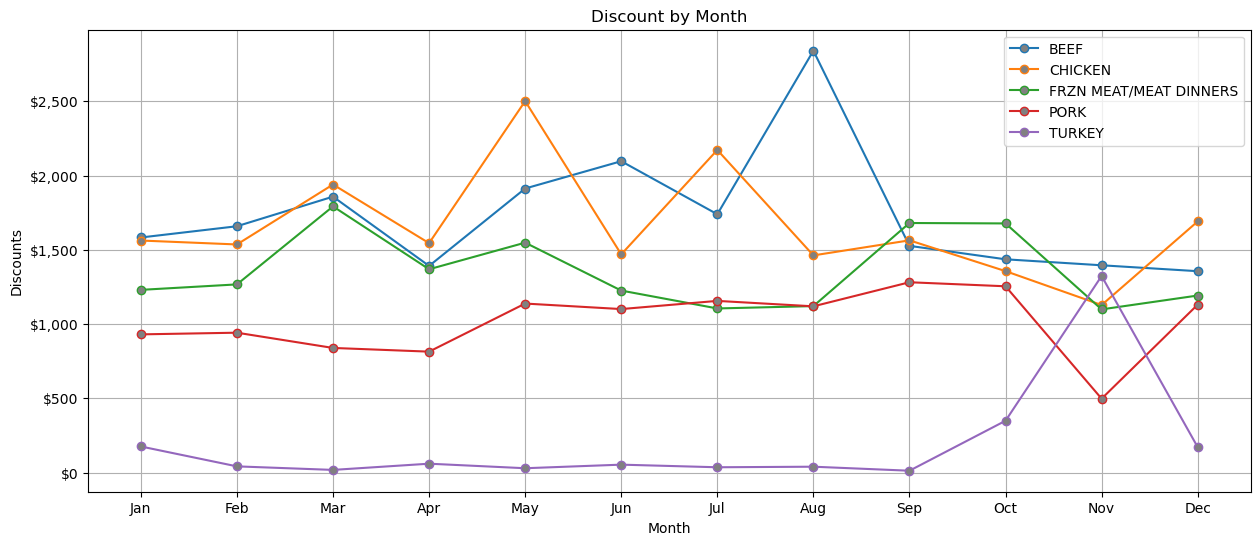

In [45]:
(
discount_per_age_month.pivot(index='month', columns='product_category', values='discount_amount')
                      .plot(kind = 'line', figsize  = (15,6), marker = 'o', markerfacecolor = 'grey')
                      .yaxis.set_major_formatter(tick_format)
)    
plt.xlabel('Month')
plt.ylabel('Discounts')
plt.title('Discount by Month')
plt.legend(loc = 'upper right')
plt.grid()
plt.xticks(month,cal_month,rotation=0)
plt.show()

**From this graph we observe that distributions availed on Beef and Chicken is the highest throughout the year. As we can see in the Thanksgiving month the spike in discounts is analogous to the sales trend and we can say that stores idea of promoting discounts on Turkey in the month of Nov is working.**

***When we compare the overall sales with the discounts availed throughout the year, it can be infered that the store has tried to promote chicken sales by pushing more discounts in the month of March, May and July but the attempts to increase sales were unsuccessful.<br>
The store should reduce the amount of discounts on chicken products and redistribute the discount budget for Pork throughout the year and Turkey in the month of November.***

## <ins>Summary</ins>:

The above data analysis has helped us in solving our business problem in an effective way and
thus, the solution proposed for our analysis are as follows:-
- ***The store should ensure good relations with their vendors who provide Beef, Frozen meat as these are the highest selling selected meat products and a zero inventory for these products would result in loss of sale.***
- ***The store is spending high amounts in discounts in order to promote chicken sales which can clearly be observed that it is not working, as Chicken sales is always 25-30% of Beef sales.***<br>
- ***The excess amounts being spent in Chicken discounts can be better utilized by promoting discounts on Pork throughout the year and on Turkey in the month of November, as they show higher potential to contribute to net sales.***

## <ins>Limitations</ins>:

***Since the data set has product category at a granular level rather than a generalized level we could only select a few products in the meat category as selecting all categories was causing cluttering in the visualization.***